### Perceptron Class defining each steps of operation


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

In [21]:
class Perceptron:
  def __init__(self, eta : float = None, epochs : int = None):
    self.weight= np.random.random(3) * 1e-4
    training = (eta is not None) and (epochs is not None)
    if training:
      print(f"Weight before training: \n{self.weight}\n")

    self.eta = eta
    self.epochs = epochs


  def _Z_outcome(self, inputs, weight):
    return np.dot(inputs, weight)


  def activation_func(self,z):
    return np.where(z > 0,1,0)


  def fit(self, X, y):
    self.X=X
    self.y=y

    X_with_bias= np.c_[self.X, -np.ones((len(self.X), 1))]
    print(f"X_with_bias: \n{X_with_bias}")

    for epochs in range(self.epochs):
      print("--" * 10)
      print("for epoch >> :", epochs )
      print("--" * 10)

      z = self._Z_outcome(X_with_bias, self.weight)
      y_pred = self.activation_func(z)
      print("Predicted value after forward pass:", y_pred)

      self.error = (self.y - y_pred)
      print(f"error is: {self.error}")

      self.weight = self.weight + self.eta * np.dot(X_with_bias.T, self.error)

      print(f"updated weight after epochs: {epochs +1 }/{self.epochs}: \n {self.weight} ")
      print("##" * 10)


  def predict(self,X):
    X_with_bias= np.c_[X, -np.ones((len(X), 1))]
    z = self._Z_outcome(X_with_bias, self.weight)
    return self.activation_func(z)


  def total_loss(self):
    Total_loss = np.sum(self.error)
    print("Total_loss:",Total_loss)
    return Total_loss


  def set_dir_(self, model_dir, filename):
    os.makedirs(model_dir, exist_ok = True)
    return os.path.join(model_dir, filename)

  def save(self, filename, model_dir = None):
    if model_dir is not None:
      model_file_path= self.set_dir_(filename, model_dir)
      joblib.dump(self, model_file_path)
    else:
      model_file_path= self.set_dir_("model", filename)
      joblib.dump(self, model_file_path)


  def load(self, filepath):
    return joblib.load(filepath)




In [22]:
AND = {
    'x1': [0,0,1,1],
    'x2': [1,0,1,0],
    'y': [0,0,0,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,1,0
1,0,0,0
2,1,1,0
3,1,0,1


In [23]:
def prepare_data(df, target_col= "y"):
    X = df.drop(target_col, axis= 1)
    y = df[target_col]
    return X, y

In [24]:
X, y = prepare_data(df_AND)

ETA = 0.1
EPOCHS = 10

model_and = Perceptron(eta = ETA, epochs= EPOCHS)
model_and.fit(X, y)

_ = model_and.total_loss()

Weight before training: 
[8.99985504e-06 7.19447113e-05 7.77431231e-05]

X_with_bias: 
[[ 0.  1. -1.]
 [ 0.  0. -1.]
 [ 1.  1. -1.]
 [ 1.  0. -1.]]
--------------------
for epoch >> : 0
--------------------
Predicted value after forward pass: [0 0 1 0]
error is: 0    0
1    0
2   -1
3    1
Name: y, dtype: int64
updated weight after epochs: 1/10: 
 [ 8.99985504e-06 -9.99280553e-02  7.77431231e-05] 
####################
--------------------
for epoch >> : 1
--------------------
Predicted value after forward pass: [0 0 0 0]
error is: 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weight after epochs: 2/10: 
 [ 0.100009   -0.09992806 -0.09992226] 
####################
--------------------
for epoch >> : 2
--------------------
Predicted value after forward pass: [0 1 1 1]
error is: 0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weight after epochs: 3/10: 
 [ 8.99985504e-06 -1.99928055e-01  1.00077743e-01] 
####################
--------------------
for epoch >> : 3
----

In [25]:
model_and.save(filename= 'and.model')

In [26]:
reload_model = Perceptron().load(filepath = '/content/model/and.model')

In [27]:
reload_model.predict(X=[[1,0]]) #Logical AND operation result

array([1])

### Plot

In [28]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)

        figure = plt.gcf()
        figure.set_size_inches(10, 8)

    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)

        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]

        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1

        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)

        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        plt.plot()

    X, y = prepare_data(df)

    _create_base_plot(df)
    _plot_decision_regions(X, y, model)

    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

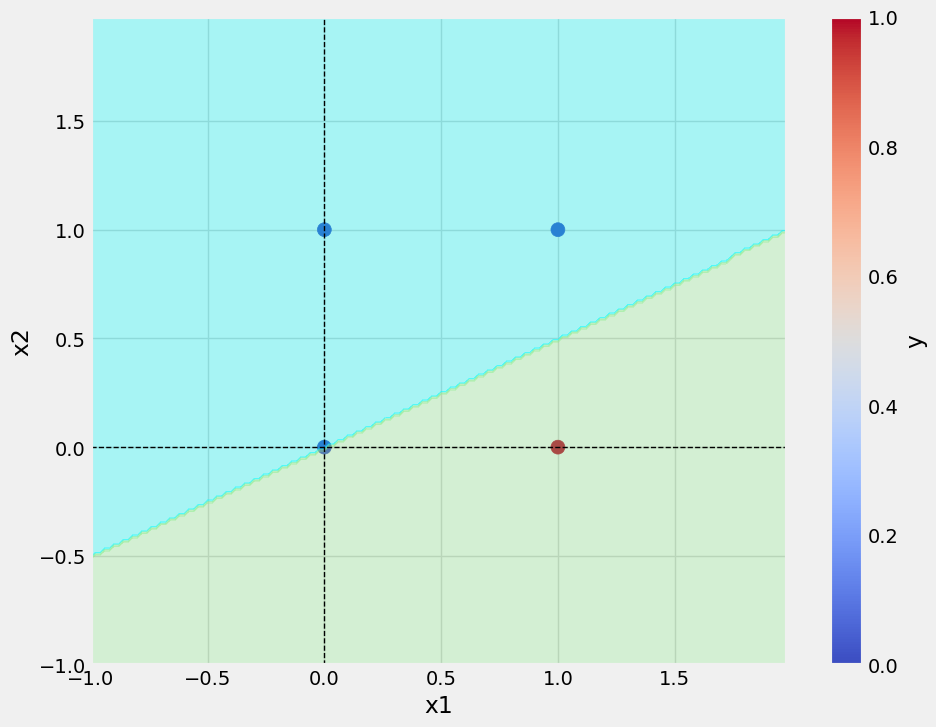

In [29]:
save_plot(df_AND, model_and, filename="and.png")

In [14]:
#Same we can perfom for OR and XOR logical gate